In [1]:
import torch

In [2]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

In [3]:
device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")

In [4]:
model_id = "runwayml/stable-diffusion-v1-5"

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
if device == "cuda":
    pipe = pipe.to(device)
    pipe.enable_attention_slicing()
else:
  pipe.to(device)

In [7]:
prompt = "ultra-detailed portrait of a red fox wearing a tiny scarf, cinematic lighting, 35mm"
negative_prompt = "blurry, lowres, jpeg artifacts, extra fingers, text, watermark"

In [8]:
image = pipe(
    prompt = prompt,
    negative_prompt = negative_prompt,
    num_inference_steps = 30,
    guidance_scale = 7.5,
    height = 512,
    width = 512,
    generator = torch.Generator(device = device).manual_seed(42)).images[0]
image.save("generated_image.png")

  0%|          | 0/30 [00:00<?, ?it/s]

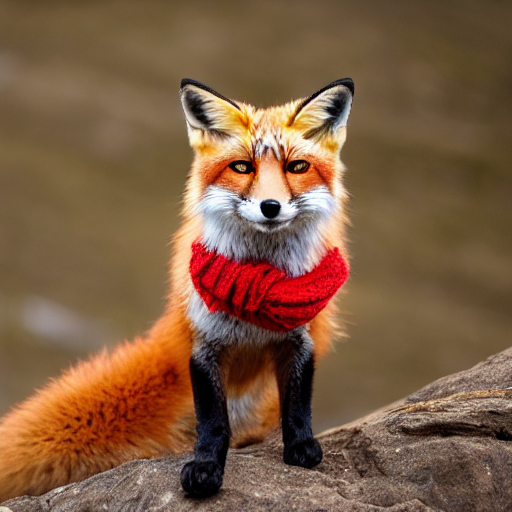

In [9]:
image

In [10]:
image_1 = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=50,   # sharper details
    guidance_scale=8.0,       # stronger adherence to prompt
    height=768,
    width=768,
    generator=torch.manual_seed(123)
).images[0]

image_1.save("high_quality.png")

  0%|          | 0/50 [00:00<?, ?it/s]

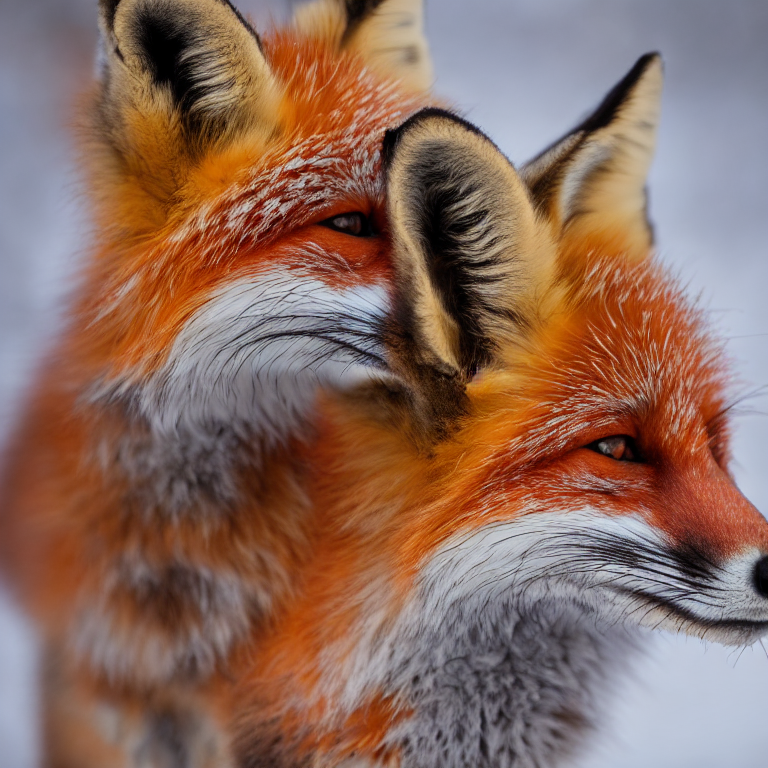

In [11]:
image_1

In [ ]:
images = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=512,
    width=512,
    num_images_per_prompt=4,   # generate 4 at once
    generator=torch.manual_seed(42)
).images

for i, img in enumerate(images):
    img.save(f"image_{i}.png")

  0%|          | 0/30 [00:00<?, ?it/s]